In [16]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10
from scipy import stats
import datetime
import sys
from io import StringIO
import statsmodels.api as sm
import os
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

In [17]:
df = pd.read_excel('Final_XLS.xlsx')
# df = pd.read_csv('cardio_train.csv')

In [18]:
print(df)
"""
Unnamed:0 here is the index. Delete or not to delete will be determined in the future.

"""

       Unnamed: 0    age  height  weight  ap_hi  ap_lo  cholesterol    BMI  \
0               0  18393     168    62.0    110     80            1  21.97   
1               1  20228     156    85.0    140     90            3  34.93   
2               2  18857     165    64.0    130     70            3  23.51   
3               3  17623     169    82.0    150    100            1  28.71   
4               4  17474     156    56.0    100     60            1  23.01   
...           ...    ...     ...     ...    ...    ...          ...    ...   
69995       69995  19240     168    76.0    120     80            1  26.93   
69996       69996  22601     158   126.0    140     90            2  50.47   
69997       69997  19066     183   105.0    180     90            3  31.35   
69998       69998  22431     163    72.0    135     80            1  27.10   
69999       69999  20540     170    72.0    120     80            2  24.91   

       gluc  smoke  alco  active  gender_2  gender_1  cardio  


'\nUnnamed:0 here is the index. Delete or not to delete will be determined in the future.\n\n'

In [19]:
# print(hot_df)
'''
age is in days. we need to change that
'''

'\nage is in days. we need to change that\n'

In [20]:
df['days'] = df['age']
df['age'] = round(df['days']/365, 0)


'\nClear correlation between weight and BMI\nWe have some potential correlation between weight and gender_1\n\n'

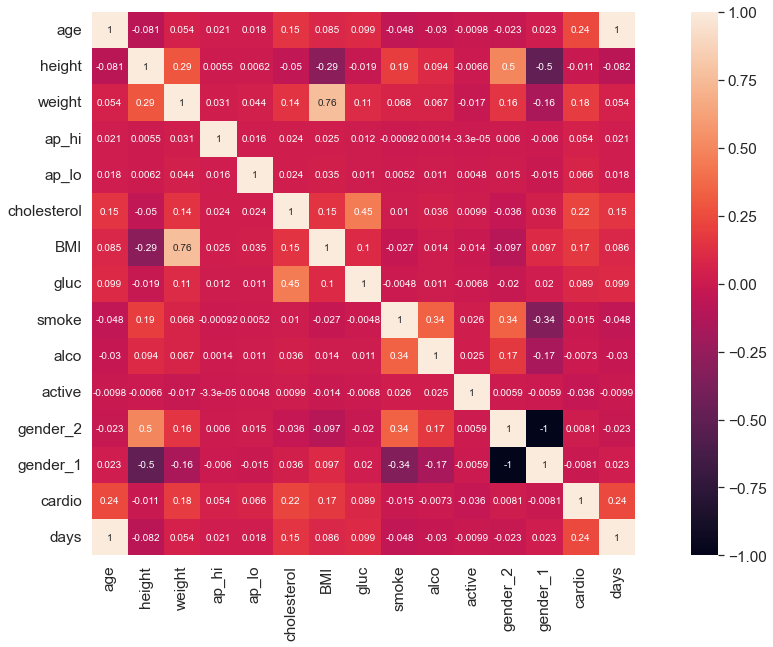

In [21]:
def make_a_corr(df):
    candidates = [col for col in df.columns if col!= 'Unnamed: 0']
    curry = df[candidates].corr()
    sns.set(font_scale = 1.4)
    sns.heatmap(curry, square = True, annot = True, annot_kws={'size':10})
    # print(candidates)

make_a_corr(df)
'''
Clear correlation between weight and BMI
We have some potential correlation between weight and gender_1

'''

In [26]:
mon = df[['cardio', 'age', 'cholesterol', 'weight', 'BMI']].corr()
mon

,cardio,age,cholesterol,weight,BMI
cardio,1.000000,0.237749,0.221147,0.181660,0.165633
age,0.237749,1.000000,0.154386,0.053661,0.085421
cholesterol,0.221147,0.154386,1.000000,0.141768,0.146268
weight,0.181660,0.053661,0.141768,1.000000,0.762003
BMI,0.165633,0.085421,0.146268,0.762003,1.000000


Average BMI of Men:  27.59
Average BMI of Women:  29.1
Average BMI of Total:  28.57
[27.59, 29.1, 28.57]


<BarContainer object of 3 artists>

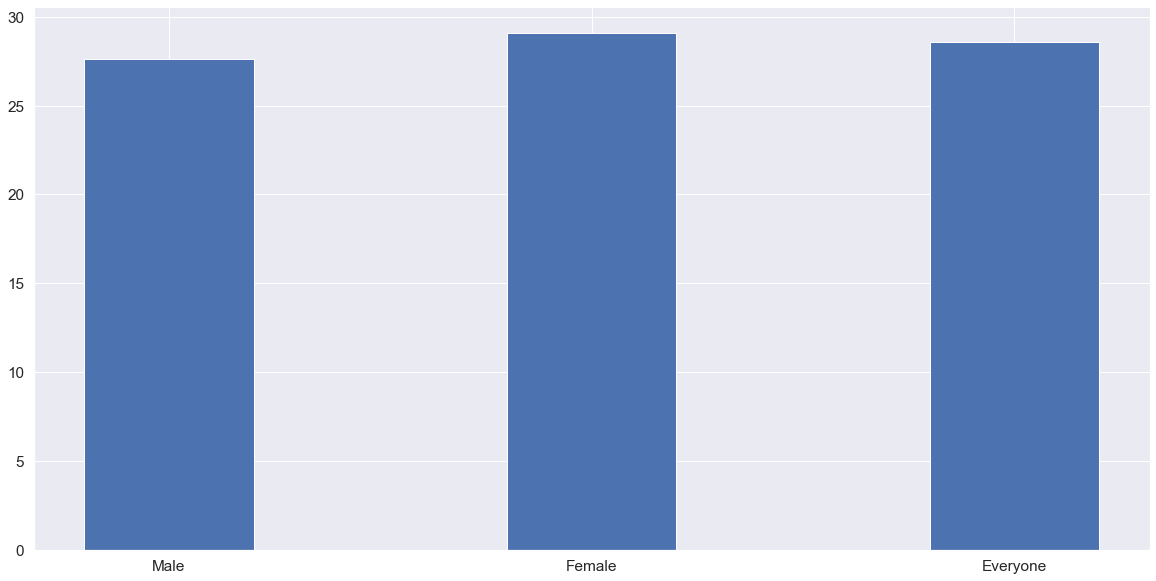

In [53]:
'''avg BMI of ppl with cardio '''
bmis_avg = []
def avg_of_BMI(df, gender):
    if gender == 'male':
        result =  df.loc[df.gender_2 == 1].loc[df.cardio == 1].BMI.mean()
        bmis_avg.append(round(result, 2))
        return result
    elif gender == 'female':
        result = df.loc[df.gender_1 == 1].loc[df.cardio == 1].BMI.mean()
        bmis_avg.append(round(result, 2))
        return result
    else:
        result = df.loc[df.cardio == 1].BMI.mean()
        bmis_avg.append(round(result, 2))
        return result

print('Average BMI of Men: ',round(avg_of_BMI(df, 'male'), 2))
print('Average BMI of Women: ', round(avg_of_BMI(df, 'female'), 2))
print('Average BMI of Total: ', round(avg_of_BMI(df, 'mmmm'), 2))
print(bmis_avg)
plt.bar(['Male', 'Female', 'Everyone'], bmis_avg, 0.4)

In [46]:
###avg age with cardio disease

def avg_of_age(df, gender):
    if gender == 'male':
        return df.loc[df.gender_2 == 1].loc[df.cardio == 1].age.mean()
    elif gender == 'female':
        return df.loc[df.gender_1 == 1].loc[df.cardio == 1].age.mean()
    else:
        return df.loc[df.cardio == 1].age.mean()

print('Average age of Men: ',round(avg_of_age(df, 'male'), 0))
print('Average age of Women: ', round(avg_of_age(df, 'female'), 0))
print('Average ageof Total: ', round(avg_of_age(df, 'mmmm'), 0))

Average BMI of Men:  55.0
Average BMI of Women:  55.0
Average BMI of Total:  55.0


In [47]:
def min_of_age(df, gender):
    if gender == 'male':
        return df.loc[df.gender_2 == 1].loc[df.cardio == 1].age.min()
    elif gender == 'female':
        return df.loc[df.gender_1 == 1].loc[df.cardio == 1].age.min()
    else:
        return df.loc[df.cardio == 1].age.min()

print('Min age of Men: ',round(min_of_age(df, 'male'), 0))
print('Min age of Women: ', round(min_of_age(df, 'female'), 0))
print('Min age of Total: ', round(min_of_age(df, 'mmmm'), 0))

Min age of Men:  39.0
Min age of Women:  39.0
Min age of Total:  39.0


In [54]:
#who's most likely to get cardioviscular. Men or Women?

mmmm = df.loc[df.gender_2 == 1] #Men
wwww = df.loc[df.gender_1 == 1] # Women

len_m = len(mmmm)
len_w = len(wwww)

ommmm= mmmm.loc[df.cardio == 1]
owwww = wwww.loc[df.cardio == 1]

len_om = len(ommmm)
len_ow = len(owwww)

res_m = len_om/len_m * 100
res_w = len_ow/len_w * 100

print(res_m, res_w)
#Men are most likely to get cardioviscular disease

50.52308949734369 49.67274324621129
